In [1]:
#from tensorflow.keras.datasets import mnist# als0 data available fash ion nmist
#(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [4]:
print(len(train_images))

60000


In [5]:
print(len(test_images))

10000


In [6]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
i=100
d=train_images[i]
label=train_labels[i]
label

8

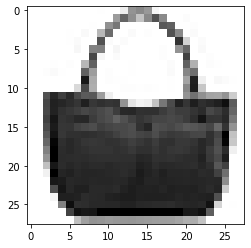

In [9]:
import matplotlib.pyplot as plt
plt.imshow(d,cmap=plt.cm.binary)
plt.show()

In [10]:
from keras import models
from keras import layers
network = models.Sequential( )
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Using TensorFlow backend.


In [11]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [12]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255#normalize
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [13]:
d/255

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.07058824, 0.41960784, 0.46666667,
        0.40392157, 0.03529412, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.38823529, 0.60784314, 0.44313725, 0.23921569,
        0.4627451 , 0.67843137, 0.45882353, 0.        , 0.        ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.43137255, 0.53333333, 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
train_labels# one hot incode its converd in catogorical error

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.5577 - accuracy: 0.8029
Epoch 2/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.3833 - accuracy: 0.8586
Epoch 3/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.3362 - accuracy: 0.8772
Epoch 4/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.3111 - accuracy: 0.8862
Epoch 5/5
60000/60000 [==============================] - 7s 125us/step - loss: 0.2926 - accuracy: 0.8931


In [17]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
test_acc

10000/10000 [==============================] - 1s 120us/step
test_acc: 0.8758000135421753


0.8758000135421753